1.1	[15 points] Following equation 1-2 (without the buffer effect), build a two-box model to compute the atmospheric CO2 level in ppm (parts per million) from 1987 to 2004.
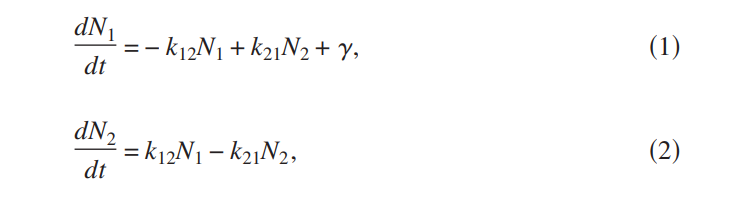
#参考https://blog.51cto.com/u_16175432/6893237?u_atoken=35355e71-3da5-44aa-b6a5-3cbd1d3d1aa4&u_asession=011YEaDuqEegc_N53kaVnQR9b9gatJVfDoqsFxHHQjO9xmSEThkNsicPMmj3LrJiJEZ3A6K8tFkvQlTAYau_0Ev9sq8AL43dpOnCClYrgFm6o&u_asig=05psoSHU7Wv6_f8KE1VSR9R9F9792YXDJsuAqRYHGf_7fSoogGZTnMNrsceRXkbURgZTG5VoZmDSQeNbpXbPt_dNa6NgxY1PniNA91_79PZjmQoJRrbBiNP_TE0LeUntfWQlNcbsJ-UeKeN5HLWU30Nvfh4K3aQJf4_WRtdIttw9Bi7MpRZvlU9dLsmmV34XkCksmHjM0JOodanL5-M1Qs1X8mSVwbonoJZHkSVt5BnDtd8qkUo2R-gplEuN6YjnpSZbHr8VzPdkczxCcpT_HRBJJCKbShCyMMK_NoiqJ-Dm3UpLHxH1iRKZmnjAu0Zefw&u_aref=CG%2F0rYKVlWXMlAvXi7TJtppVWak%3D

In [166]:
# Import modules
import numpy as np
import pandas as pd
import sympy as sym
#from sympy import *
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [167]:
# Read a csv file
global_co2 = pd.read_csv("global.1751_2014.csv")
#计算gamma 1986-2004
global_fossil_co2=pd.to_numeric(global_co2['Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'][1:])-global_co2['Carbon emissions from cement production'][1:]
gamma=global_fossil_co2/(1000*2.13)
global_co2['gamma']=gamma
gamma_data=global_co2[236:255]  #所研究的数据
gamma_data
#np.mean(gamma_data['gamma'])

,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C),Carbon emissions from gas fuel consumption,Carbon emissions from liquid fuel consumption,Carbon emissions from solid fuel consumption,Carbon emissions from cement production,Carbon emissions from gas flaring,Per capita carbon emissions (metric tons of carbon; after 1949 only),gamma
236,1986,5583,830,2293.0,2277.0,137.0,46.0,1.13,2.556808
237,1987,5725,892,2306.0,2339.0,143.0,44.0,1.14,2.620657
238,1988,5936,935,2412.0,2387.0,152.0,50.0,1.16,2.715493
239,1989,6066,982,2459.0,2428.0,156.0,41.0,1.16,2.774648
240,1990,6074,1026,2492.0,2359.0,157.0,40.0,1.14,2.777934
241,1991,6142,1051,2601.0,2284.0,161.0,45.0,1.14,2.807981
242,1992,6078,1085,2499.0,2290.0,167.0,36.0,1.11,2.775117
243,1993,6070,1117,2515.0,2225.0,176.0,37.0,1.09,2.767136
244,1994,6174,1133,2539.0,2278.0,186.0,39.0,1.09,2.811268
245,1995,6305,1151,2560.0,2359.0,197.0,39.0,1.10,2.867606


In [168]:
#大气中二氧化碳观测值 1986-2004
co2_ann = pd.read_csv('co2_annmean_mlo.csv')
co2_ann_test=co2_ann[27:46]
##计算因子
kexi=3.69+co2_ann_test['mean']*1.86*10**(-2)-(co2_ann_test['mean']**2)*1.80*10**(-6) 
co2_ann_test['buffer factor']=kexi
co2_ann_test

C:\Users\HP\AppData\Local\Temp\ipykernel_11516\1890320184.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2_ann_test['buffer factor']=kexi


,year,mean,unc,buffer factor
27,1986,347.61,0.12,9.938047
28,1987,349.31,0.12,9.967535
29,1988,351.69,0.12,10.008799
30,1989,353.20,0.12,10.034970
31,1990,354.45,0.12,10.056627
32,1991,355.70,0.12,10.078280
33,1992,356.54,0.12,10.092827
34,1993,357.21,0.12,10.104428
35,1994,358.96,0.12,10.134722
36,1995,360.97,0.12,10.169503


In [169]:
#利用sympy库求解解析解
x = sym.symbols("x")
f = sym.Function("f")
f = sym.exp(x)   #只是给出f的形式
#f = sym.tan(x) - sym.exp(x) + x**2 + sym.sqrt(x)
y,z = sym.symbols("y,z",cls = sym.Function)
k12=105/740
k21=102/900
r=2.62  #给定一个初值
eq1=Eq(y(x).diff(x),-k12*y(x)+k21*z(x)+r)  #第一个微分方程
eq2=Eq(z(x).diff(x),k12*y(x)-k21*z(x))    #第二个微分方程
s = sym.dsolve([eq1,eq2])  #求解微分方程组
y= sym.trigsimp(s[0].rhs)  #大气中二氧化碳通解
z= sym.trigsimp(s[1].rhs) #海洋中二氧化碳通解
y,z

(0.798730158730159*C1 - 1.0*C2*exp(-0.255225225225225*x) + 1.16341687257324*x + 5.70705002274515,
 1.0*C1 + 1.0*C2*exp(-0.255225225225225*x) + 1.45658312742676*x - 5.70705002274515)

In [171]:
#利用scipy库求解数值解
# 定义微分方程组的函数
def equations(u, x):
    y, z = u
    dy_dx = -k12*y+k21*z+r
    dz_dx = k12*y-k21*z
    return [dy_dx,dz_dx]

# 定义初始条件和时间范围
k12=105/740
k21=102/900
r=np.mean(gamma_data['gamma']) ##gamma变化不大，这里选取均值进行替换
initial_conditions = [347, 423]  #给定初值条件   347=740/2.13,423 =900/2.13
time = np.arange(0,19)

# 求解微分方程组
result = odeint(equations, initial_conditions, time) #得到方程的数值解
result

array([[347.        , 423.        ],
       [348.58747534, 424.33503516],
       [350.10969121, 425.73532979],
       [351.58134603, 427.18618547],
       [353.01382544, 428.67621657],
       [354.41595828, 430.19659423],
       [355.7945618 , 431.74050121],
       [357.15496783, 433.30260568],
       [358.5012537 , 434.87883031],
       [359.83660777, 436.46598675],
       [361.16349006, 438.06161496],
       [362.48380971, 439.66380581],
       [363.79904441, 441.27108161],
       [365.11034012, 442.8822964 ],
       [366.41858414, 444.49656288],
       [367.72446365, 446.11319387],
       [369.02851137, 447.73165666],
       [370.33113991, 449.35153862],
       [371.63266856, 450.97252047]])

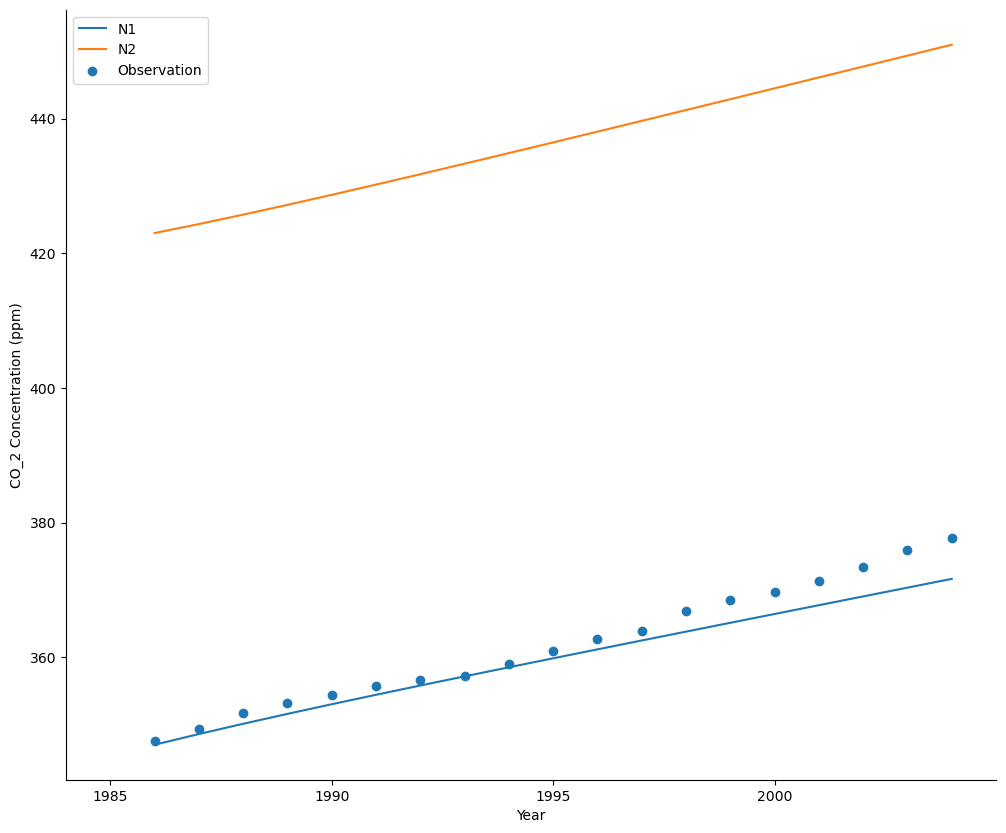

In [172]:
# 绘制解的图像
times=time+1986
times
plt.figure(figsize=(12,10))
plt.plot(times, result[:, 0], label='N1')
plt.plot(times, result[:, 1], label='N2')  
plt.scatter(times, co2_ann_test['mean'], label='Observation')  
plt.xlabel('Year')
plt.ylabel('CO_2 Concentration (ppm)')
plt.xlim(1984,2005)
plt.xticks([1985,1990,1995,2000],[1985,1990,1995,2000])
plt.legend()
ax=plt.gca( )#gca:get current axis得到当前轴
#设置图片的右边框和上边框为不显示
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()

1.2 [20 points] Following equation 3-4 (with the buffer effect), build a two-box model to compute the atmospheric CO2 level in ppm from 1987 to 2004.
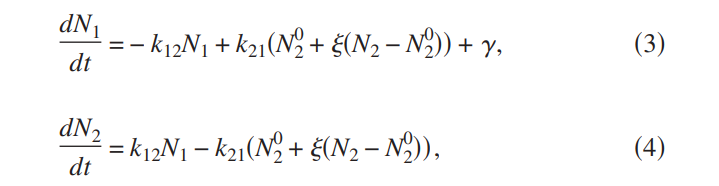

In [173]:
#利用scipy库求解数值解
# 定义微分方程组的函数
def equations1(u, x):
    y, z = u
    #z=(n2_0+a(z-n2_0))
    dy_dx = -k12*y+k21*(n2_0+a*(z-n2_0))+r
    dz_dx = k12*y-k21*(n2_0+a*(z-n2_0))
    return [dy_dx,dz_dx]

# 定义初始条件和时间范围
k12=105/740
k21=102/900
n2_0=821/2.13
initial_conditions1 = [384.5,385.4]  #给定初值条件,384.5=(740+79)/2.13,385.4=900-79/2.13
time = np.arange(0,19)

r=np.mean(gamma_data['gamma']) #gamma变化不大，这里选取均值进行替换
a=np.mean(co2_ann_test['buffer factor'])  #buffer factor变化不大，这里选取均值进行替换
# 求解微分方程组
result1 = odeint(equations1, initial_conditions1, time) #得到方程的数值解
result1
result1[0, 0]=380
result1

array([[380.        , 385.4       ],
       [381.15827844, 391.66423206],
       [382.13470552, 393.61031548],
       [384.29243208, 394.37509942],
       [386.77332536, 394.81671665],
       [389.34262614, 395.16992636],
       [391.9361109 , 395.49895211],
       [394.53621206, 395.82136145],
       [397.13812422, 396.14195979],
       [399.74053146, 396.46206305],
       [402.34307264, 396.78203237],
       [404.94565241, 397.10196311],
       [407.54824192, 397.4218841 ],
       [410.15083406, 397.74180246],
       [412.75342695, 398.06172007],
       [415.35601995, 398.38163757],
       [417.95861315, 398.70155487],
       [420.56120642, 399.02147211],
       [423.16379966, 399.34138937]])

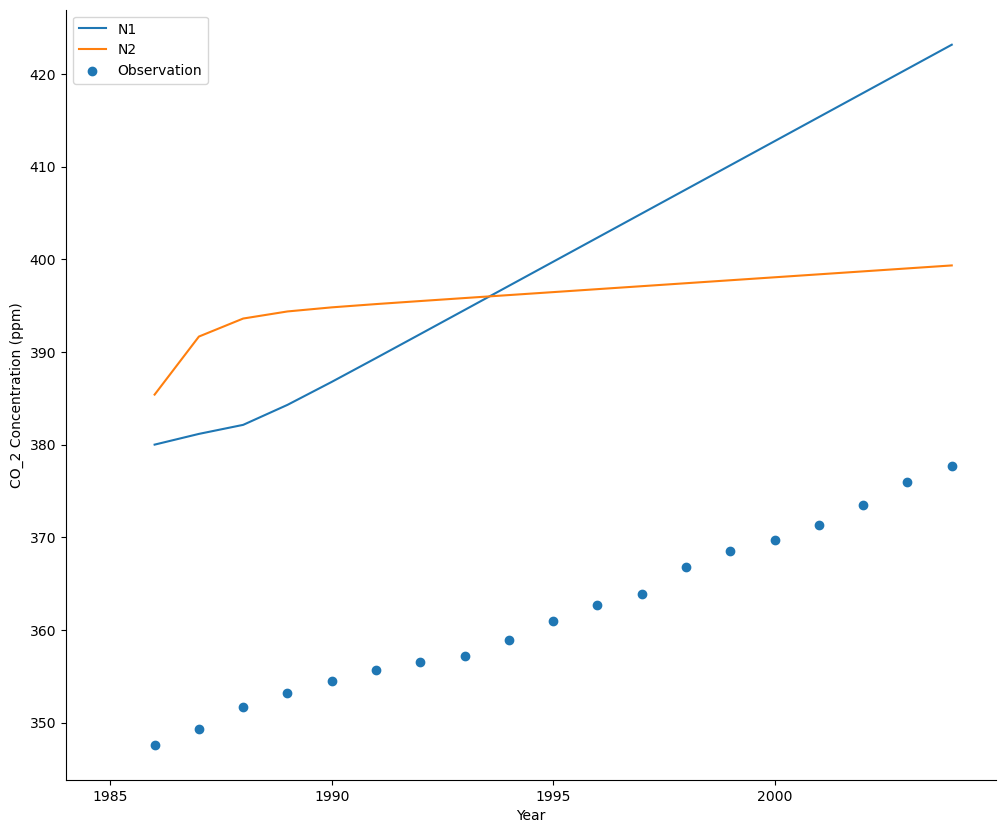

In [174]:
# 绘制解的图像
times=time+1986
times
plt.figure(figsize=(12,10))
plt.plot(times, result1[:, 0], label='N1')
plt.plot(times, result1[:, 1], label='N2')  
plt.scatter(times, co2_ann_test['mean'], label='Observation')  
plt.xlabel('Year')
plt.ylabel('CO_2 Concentration (ppm)')
plt.xlim(1984,2005)
plt.xticks([1985,1990,1995,2000],[1985,1990,1995,2000])
plt.legend()
ax=plt.gca( )#gca:get current axis得到当前轴
#设置图片的右边框和上边框为不显示
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')  
plt.show()

1.3 [5 points] Based on your results from 1.1 and 1.2, reproduce Figure 2 in Tomizuka (2009) as much as you can.

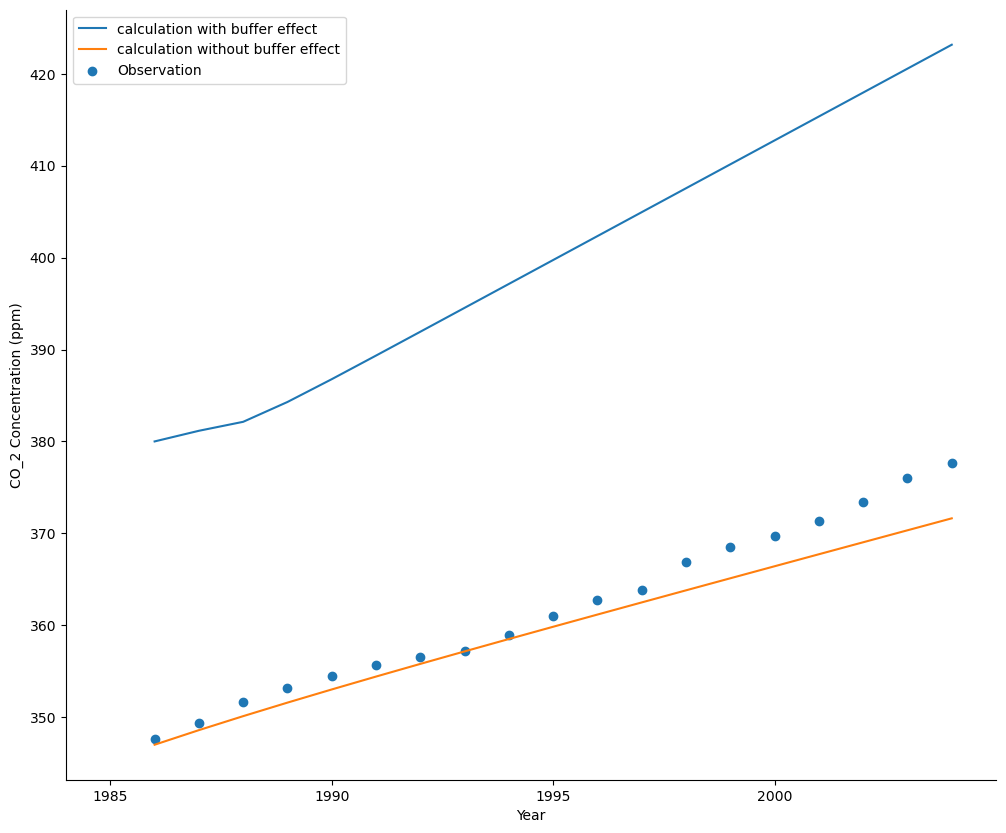

In [175]:
##第一问和第二问做对比
# 绘制解的图像
times=time+1986
times
plt.figure(figsize=(12,10))
plt.plot(times, result1[:, 0], label='calculation with buffer effect')
plt.plot(times, result[:, 0], label='calculation without buffer effect')  
plt.scatter(times, co2_ann_test['mean'], label='Observation')  
plt.xlabel('Year')
plt.ylabel('CO_2 Concentration (ppm)')
plt.xlim(1984,2005)
plt.xticks([1985,1990,1995,2000],[1985,1990,1995,2000])
plt.legend()
# 绘制解的图像
ax=plt.gca( )#gca:get current axis得到当前轴
#设置图片的右边框和上边框为不显示
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none') 
plt.show()